<a href="https://colab.research.google.com/github/NairCorbalan/Data/blob/main/1erEntregaProyectoFinalDSII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Construir un modelo de Machine Learning para predecir si un paciente tiene una enfermedad basándose en un conjunto de atributos clínicos. Utilizaremos un RandomForestClassifier.

Dataset: Enfermedades

Pasos:

1. Introducción y Objetivo: Definir el problema y el objetivo.
2. Importar Librerías: Cargar las herramientas necesarias.
3. Carga de Datos: Leer el dataset.
4. Hipótesis/ Preguntas de interés. Plantear una hipótesis clara y preguntas que nos guien para el desarrollo del análisis.
5. Análisis Exploratorio de Datos (EDA): Entender los datos, distribuciones, valores faltantes y relaciones.
6. Insights: resumen de hallazgos.

1. Introducción y Objetivo
Objetivo: El objetivo es predecir el tipo de enfermedad del paciente.

2. Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

3. Carga de Datos

In [ ]:
df = pd.read_csv('enfermedades.csv')

In [ ]:
from google.colab import files
files.upload()

Saving enfermedades.csv to enfermedades.csv


{'enfermedades.csv': b'Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Diagnosis,Severity_Score,Treatment,Admission_Date,Discharge_Date,Hospital_Stay_Days,Insurance_Status,Complications,Previous_Conditions\n1,69,Hombre,Fiebre,Dolor de garganta,Dolor abdominal,Gripe,8,Antibi\xc3\xb3ticos,2024-08-29,2024-09-16,18,No cubierto,Infecci\xc3\xb3n secundaria,Asma\n2,32,Hombre,Fatiga,Escalofr\xc3\xados,Dolor abdominal,Resfriado com\xc3\xban,5,L\xc3\xadquidos,2024-05-11,2024-06-09,29,No cubierto,Infecci\xc3\xb3n secundaria,Enfermedad card\xc3\xadaca\n3,89,Mujer,Dolor de cabeza,Erupci\xc3\xb3n cut\xc3\xa1nea,Mareos,Enfermedad viral,8,Reposo,2024-12-29,2025-01-23,25,Cubierto,Ninguna,Asma\n4,78,Hombre,Fiebre,Congesti\xc3\xb3n nasal,V\xc3\xb3mitos,Gripe,9,L\xc3\xadquidos,2024-04-21,2024-04-28,7,No cubierto,Ninguna,Hipertensi\xc3\xb3n\n5,38,Hombre,Tos,Congesti\xc3\xb3n nasal,Dolor abdominal,Infecci\xc3\xb3n bacteriana,4,Analg\xc3\xa9sicos,2024-01-07,2024-01-23,16,Cubierto,Neumon\xc3\xada,Enfermed

In [ ]:
url = 'enfermedades.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Diagnosis,Severity_Score,Treatment,Admission_Date,Discharge_Date,Hospital_Stay_Days,Insurance_Status,Complications,Previous_Conditions
0,1,69,Hombre,Fiebre,Dolor de garganta,Dolor abdominal,Gripe,8,Antibióticos,2024-08-29,2024-09-16,18,No cubierto,Infección secundaria,Asma
1,2,32,Hombre,Fatiga,Escalofríos,Dolor abdominal,Resfriado común,5,Líquidos,2024-05-11,2024-06-09,29,No cubierto,Infección secundaria,Enfermedad cardíaca
2,3,89,Mujer,Dolor de cabeza,Erupción cutánea,Mareos,Enfermedad viral,8,Reposo,2024-12-29,2025-01-23,25,Cubierto,Ninguna,Asma
3,4,78,Hombre,Fiebre,Congestión nasal,Vómitos,Gripe,9,Líquidos,2024-04-21,2024-04-28,7,No cubierto,Ninguna,Hipertensión
4,5,38,Hombre,Tos,Congestión nasal,Dolor abdominal,Infección bacteriana,4,Analgésicos,2024-01-07,2024-01-23,16,Cubierto,Neumonía,Enfermedad cardíaca


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           1000 non-null   int64 
 1   Age                  1000 non-null   int64 
 2   Gender               1000 non-null   object
 3   Symptom_1            1000 non-null   object
 4   Symptom_2            1000 non-null   object
 5   Symptom_3            1000 non-null   object
 6   Diagnosis            1000 non-null   object
 7   Severity_Score       1000 non-null   int64 
 8   Treatment            1000 non-null   object
 9   Admission_Date       1000 non-null   object
 10  Discharge_Date       1000 non-null   object
 11  Hospital_Stay_Days   1000 non-null   int64 
 12  Insurance_Status     1000 non-null   object
 13  Complications        1000 non-null   object
 14  Previous_Conditions  1000 non-null   object
dtypes: int64(4), object(11)
memory usage: 117.3+ KB


4. Preguntas de interés / Hipótesis

Hipótesis Nula (H0): Las características clínicas y demográficas disponibles (edad, sexo, condiciones previas, etc.) no son suficientes para predecir la presencia de enfermedad con una precisión significativamente mejor que el azar.

Hipótesis Alternativa (H1): Es posible construir un modelo de clasificación (Random Forest) utilizando las características clínicas y demográficas que prediga la presencia de enfermedad y AUC (Area Under Curve) significativamente superiores al 50% (azar). Esperamos alcanzar una precisión > 75%.

5. Análisis exploratorio de datos (EDA)


5.1 Revisar valores faltantes


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values

,0
Patient_ID,0
Age,0
Gender,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Diagnosis,0
Severity_Score,0
Treatment,0
Admission_Date,0


5.2. Distribución de la variable objetivo ('diagnosis')

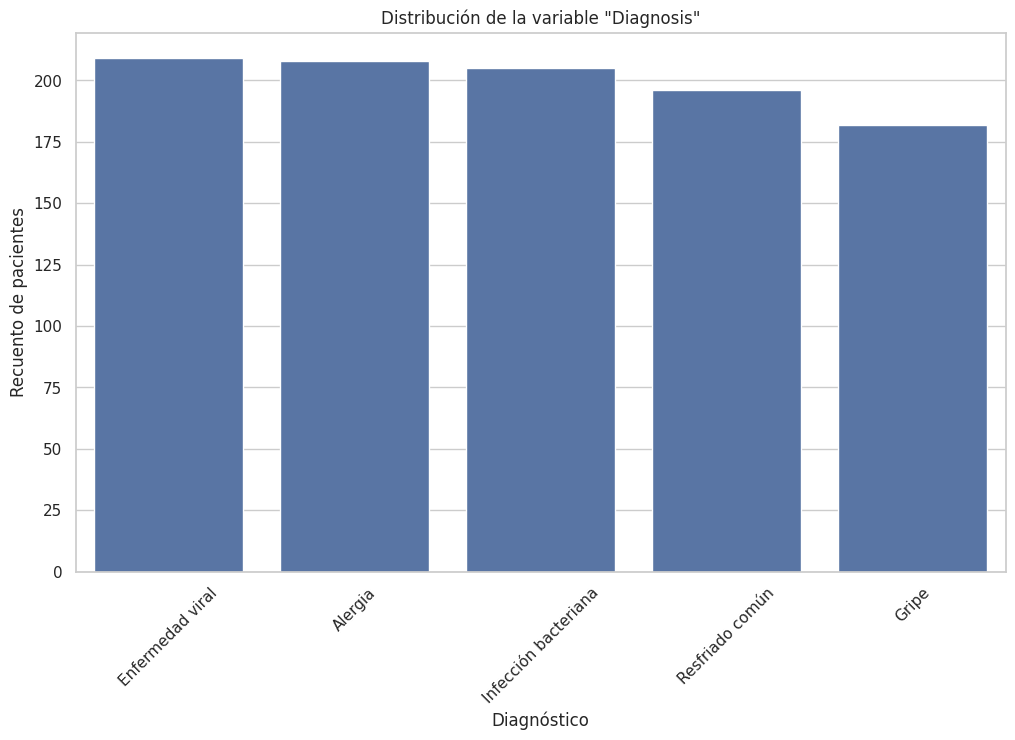

In [ ]:
variable_categorica = 'Diagnosis'

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=variable_categorica, order = df[variable_categorica].value_counts().index)

plt.title(f'Distribución de la variable "{variable_categorica}"')
plt.xlabel('Diagnóstico')
plt.ylabel('Recuento de pacientes')
plt.xticks(rotation=45)
plt.show()

5.3 Análisis de las variables numéricas

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Patient_ID', 'Age', 'Severity_Score', 'Hospital_Stay_Days']

In [ ]:
variables_para_hist = [col for col in numerical_features if col != 'Patient_ID']

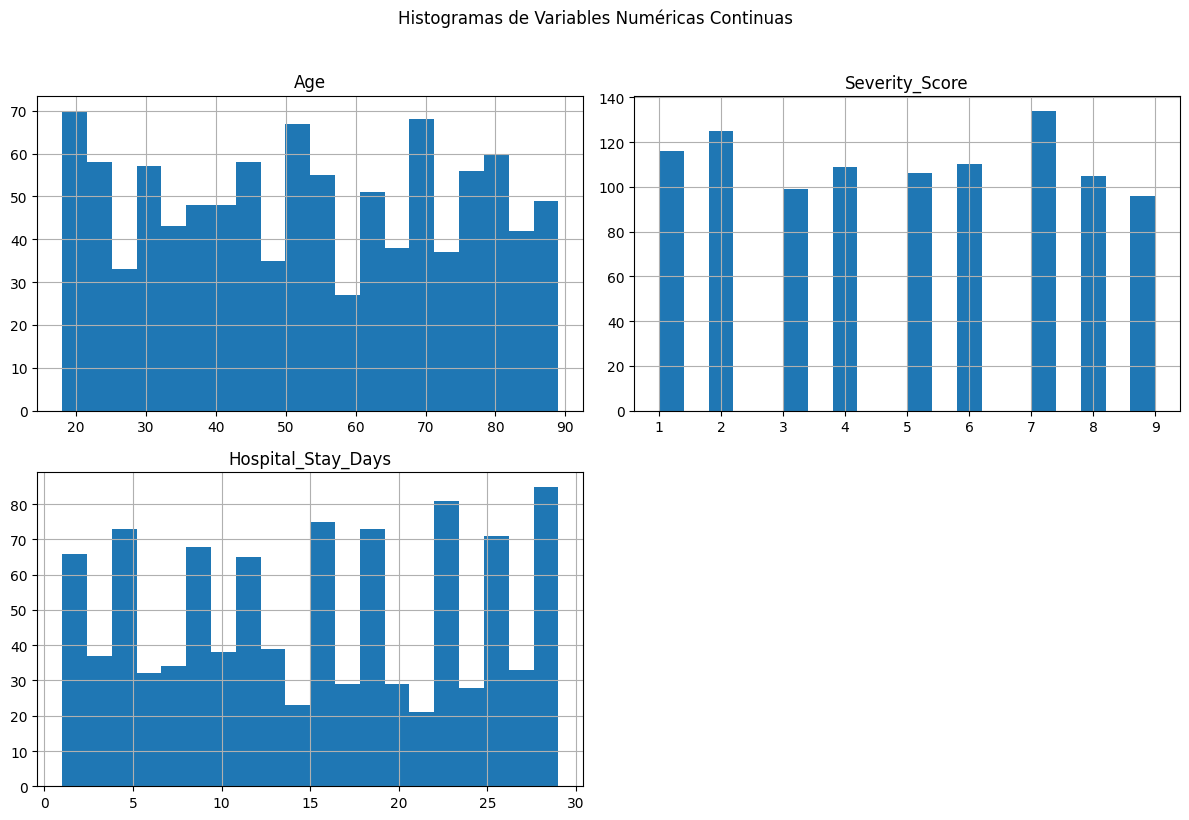

In [ ]:
# Histogramas para variables continuas
df[variables_para_hist].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()


Boxplots de Variables Numéricas Continuas con Diagnóstico:


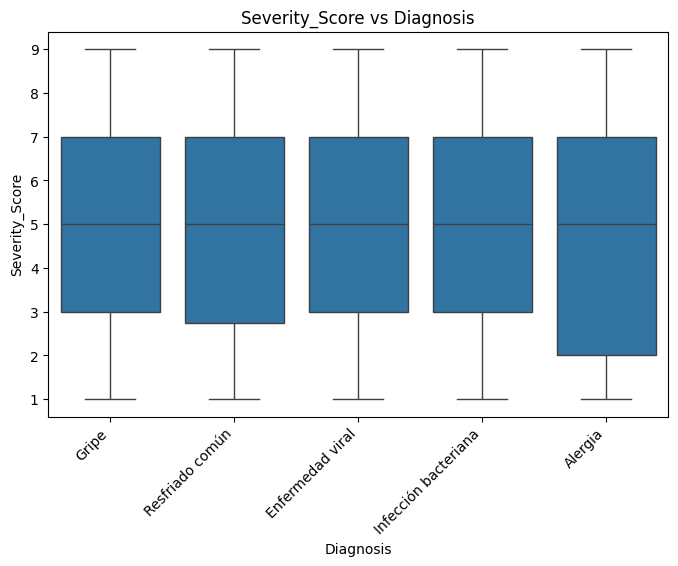

In [ ]:
print("\nBoxplots de Variables Numéricas Continuas con Diagnóstico:")
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='Severity_Score', data=df)
plt.title('Severity_Score vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Severity_Score')
plt.xticks(rotation=45, ha='right')
plt.show()

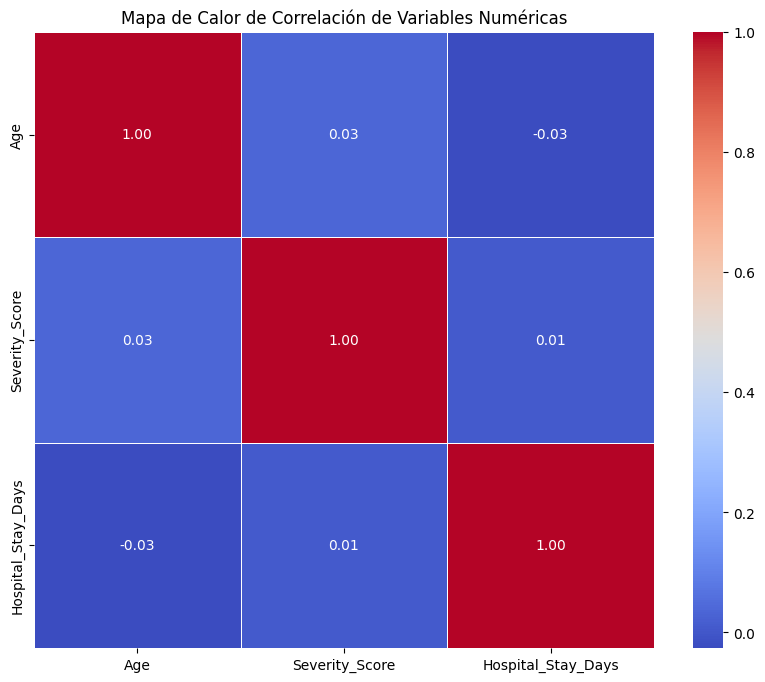

In [ ]:
# heatmap para correlaciones entre variables

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if 'Patient_ID' in numerical_cols:
    numerical_cols.remove('Patient_ID')

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

5.4 Análisis de variables categóricas

In [ ]:
categorical_features = [
'Gender',
'Symptom_1',
'Symptom_2',
'Symptom_3',
'Diagnosis',
'Treatment',
'Insurance_Status',
'Complications',
'Previous_Conditions'
]

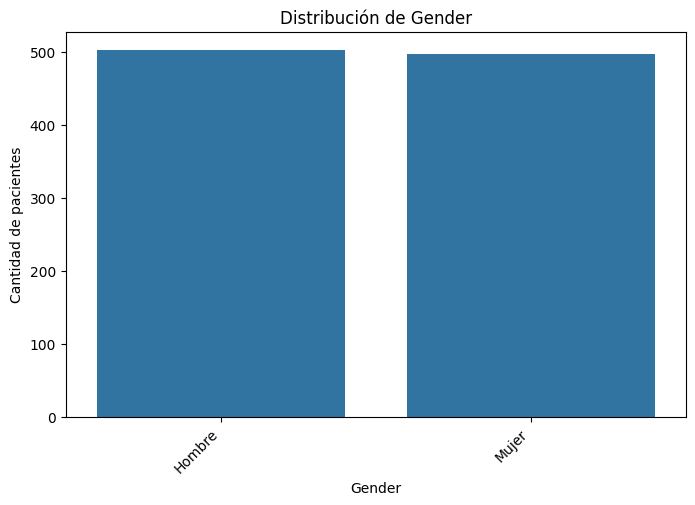

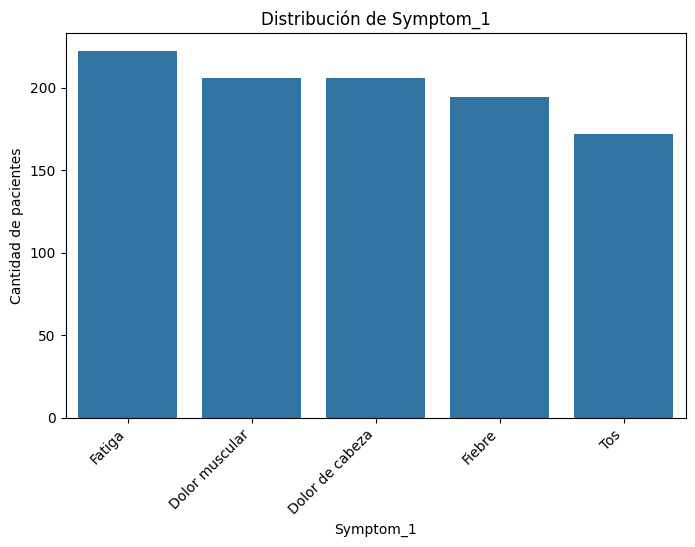

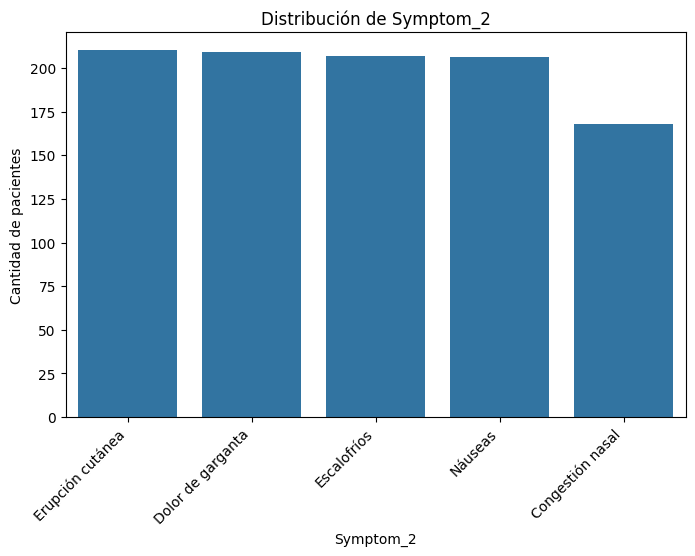

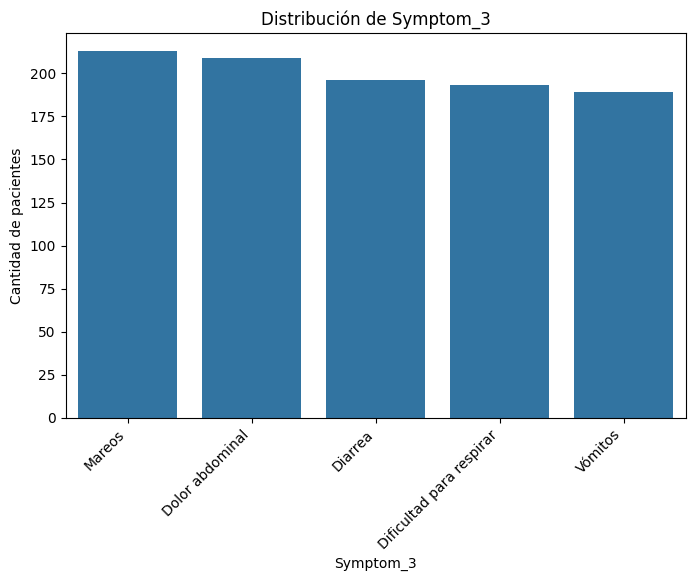

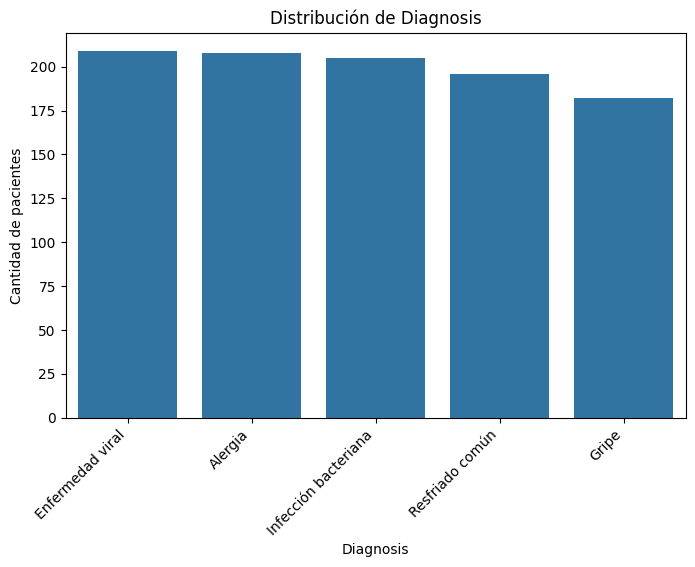

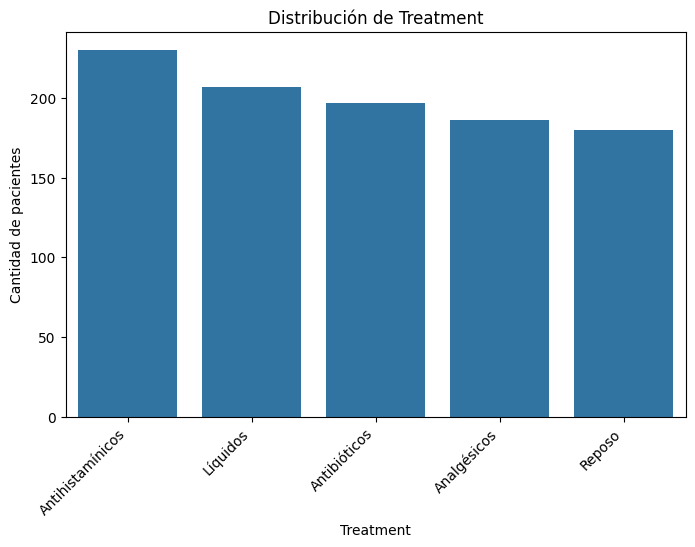

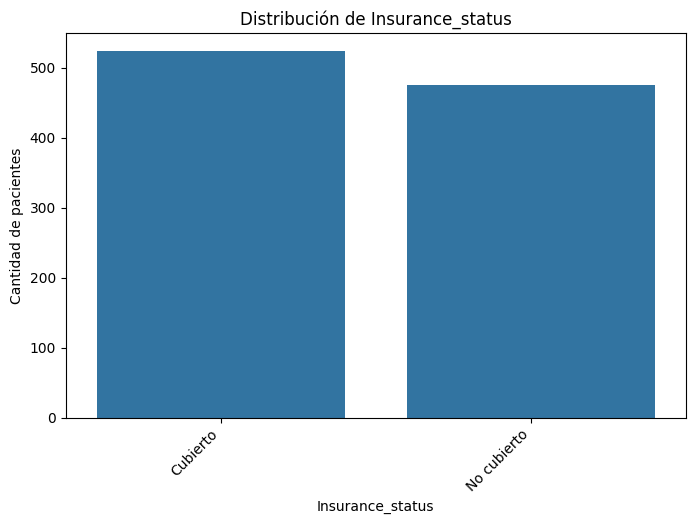

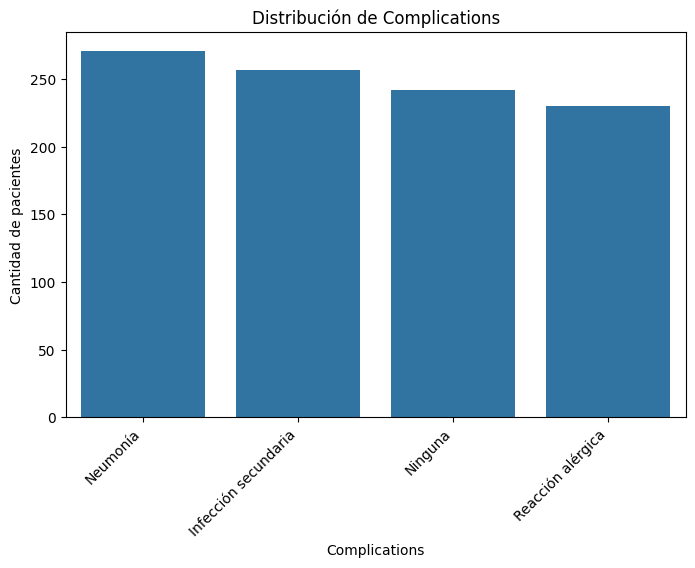

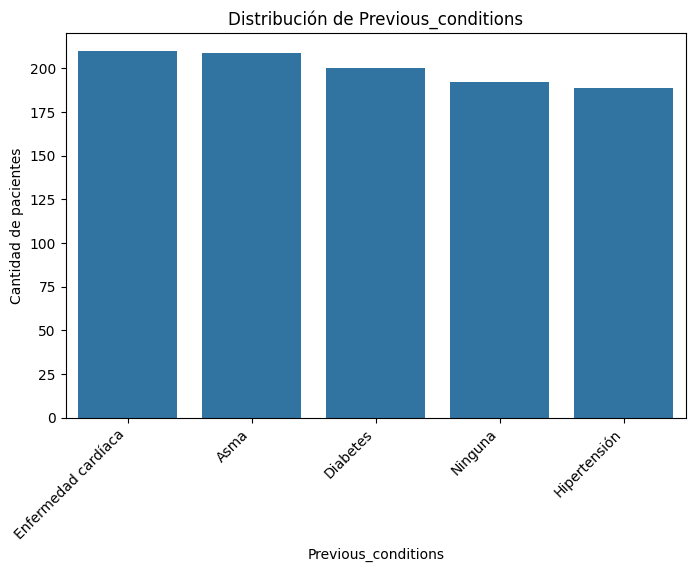

In [ ]:
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de pacientes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

6. Insights

Distribución de Diagnósticos: Al observar la Distribución de la variable 'Diagnosis', podremos identificar si algunas enfermedades son más prevalentes que otras. Si hay un desequilibrio significativo en las clases, esto será un insight crucial a considerar para el entrenamiento y evaluación del modelo.

 El boxplot de SeverityScore vs. Diagnosis probablemente mostrará que ciertos diagnósticos están asociados con puntuaciones de gravedad consistentemente más altas o más bajas. Esto sugeriría que SeverityScore es una variable predictiva
importante.

 Impacto de la Edad y Estancia Hospitalaria en el Diagnóstico: Los histogramas nos darán insights sobre si la edad del paciente o la duración de su estancia en el hospital tienen una relación con el tipo de enfermedad diagnosticada. Podríamos ver que ciertas enfermedades son más comunes en rangos de edad específicas o
requieren hospitalizaciones más prolongadas